In [232]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings                       
warnings.filterwarnings("ignore")

In [233]:
# read the data containing file

df=pd.read_csv('train_final.csv')
df.head()

,X,duration,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,rerror_rate,srv_rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,serror_rate,Target
0,386377,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.00,1.0,26.0,0.01,0.0,0.0,0.00,0.0
1,661061,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,255.0,0.00,0.0,0.0,0.00,0.0
2,842325,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.35,0.0,255.0,0.00,0.0,0.0,0.04,0.0
3,60237,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.00,0.0,56.0,0.05,0.0,0.0,0.00,0.0
4,656951,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.00,0.0,62.0,0.03,1.0,1.0,0.00,0.0


In [234]:
df.shape # No. data points in our dataset

(98000, 28)

In [235]:
df.dtypes # returns the datatypes in our data

X                                int64
duration                       float64
land                             int64
wrong_fragment                   int64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                 float64
rerror_rate                    float64
srv_rerror_rate                float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                 float64
dst_host_srv_diff_host_rate    float64
dst_host_rerror_rate           float64
dst_host_srv_rerror_rate 

In [236]:
round(100*(df.isnull().sum()/len(df.index)),2) # percentage of null values

X                              0.00
duration                       0.01
land                           0.00
wrong_fragment                 0.00
urgent                         0.01
hot                            0.01
num_failed_logins              0.01
logged_in                      0.02
num_compromised                0.01
root_shell                     0.01
su_attempted                   0.01
num_root                       0.02
num_file_creations             0.01
num_shells                     0.01
num_access_files               0.01
num_outbound_cmds              0.00
is_host_login                  0.00
is_guest_login                 0.01
rerror_rate                    0.01
srv_rerror_rate                0.01
diff_srv_rate                  0.01
srv_diff_host_rate             0.01
dst_host_count                 0.01
dst_host_srv_diff_host_rate    0.01
dst_host_rerror_rate           0.01
dst_host_srv_rerror_rate       0.01
serror_rate                    0.02
Target                      

In [237]:
df.dropna(axis=0,inplace=True) 

- As the percentage of missing values are quite low we can DROP the missing values

In [238]:
df.isnull().sum()

X                              0
duration                       0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
rerror_rate                    0
srv_rerror_rate                0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_diff_host_rate    0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
serror_rate                    0
Target                         0
dtype: int64

- we can see that our data is clean now

In [239]:
df.shape

(97743, 28)

- This the final data we have with 97743 rows and 28 columns

In [240]:
lst=['duration', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'rerror_rate', 'srv_rerror_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_diff_host_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'serror_rate']

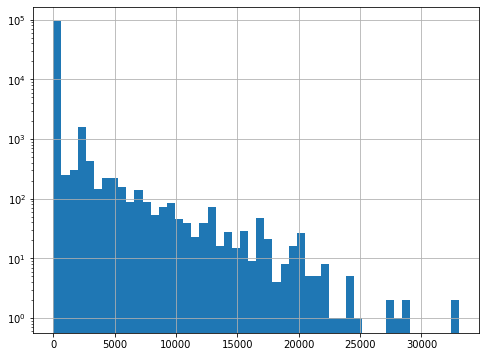

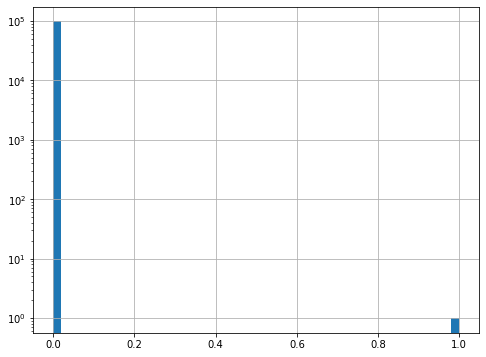

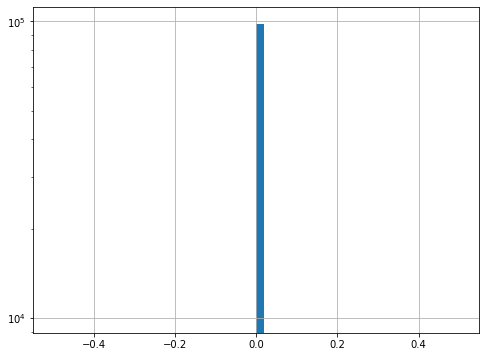

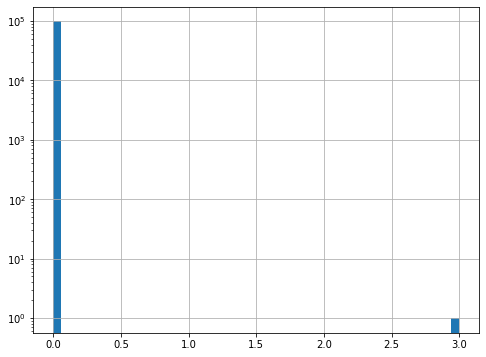

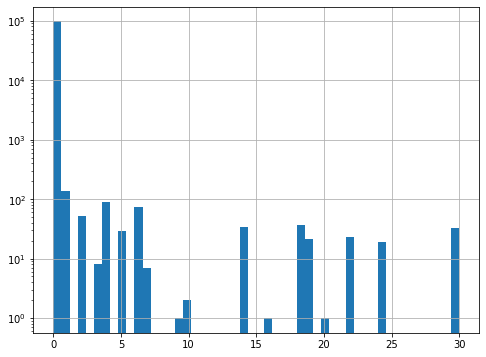

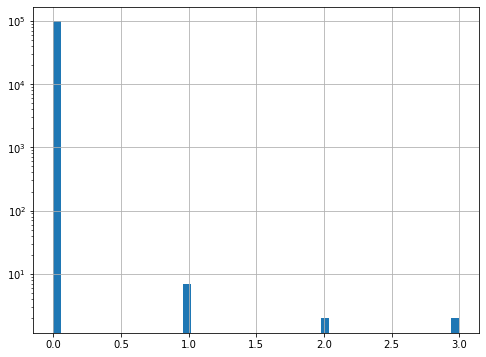

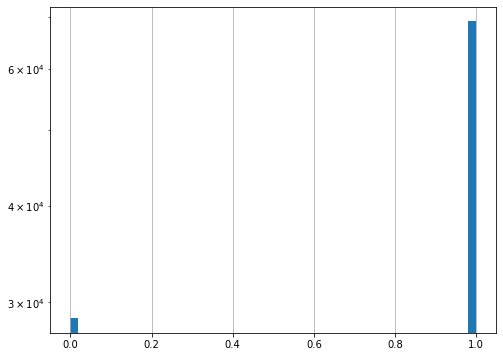

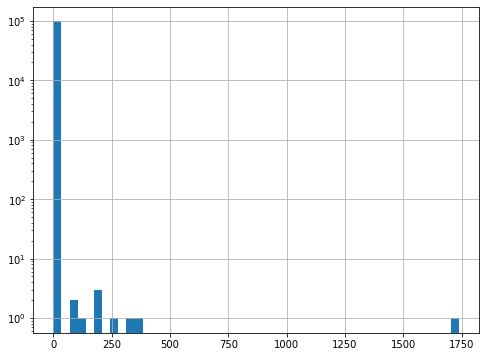

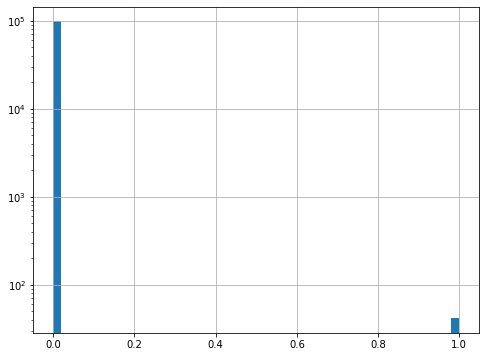

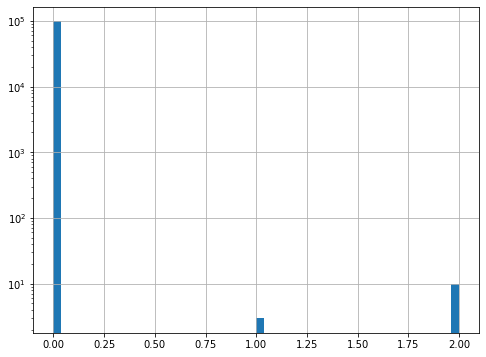

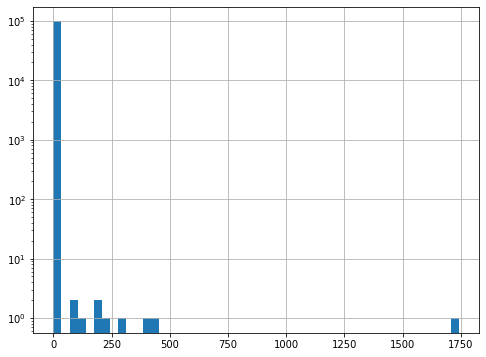

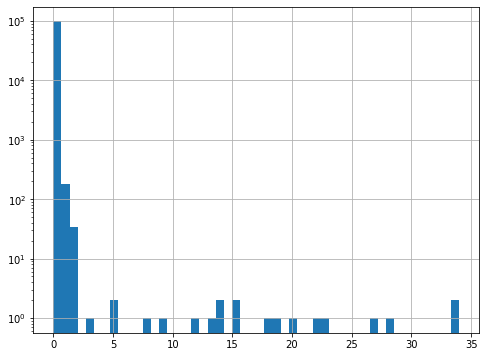

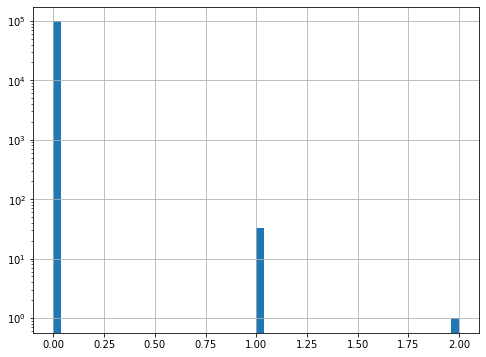

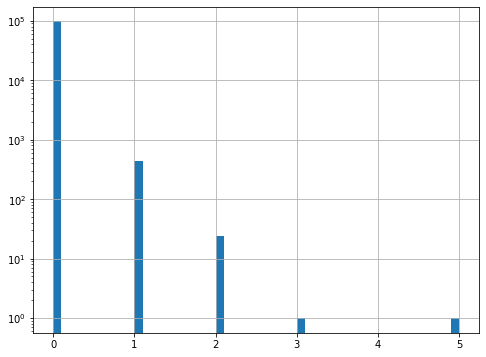

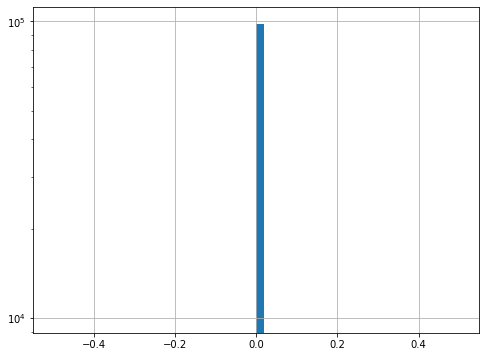

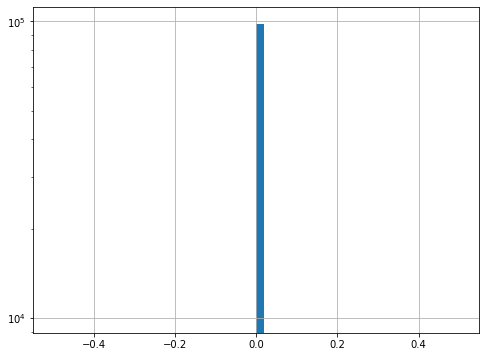

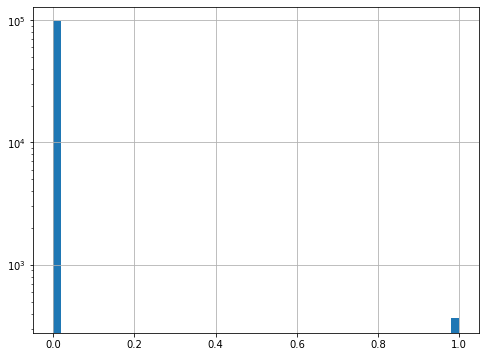

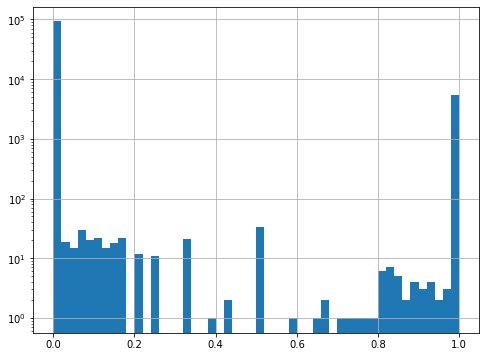

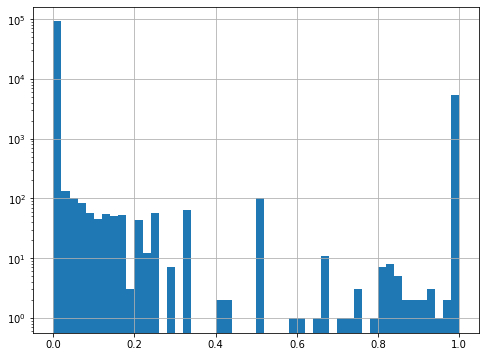

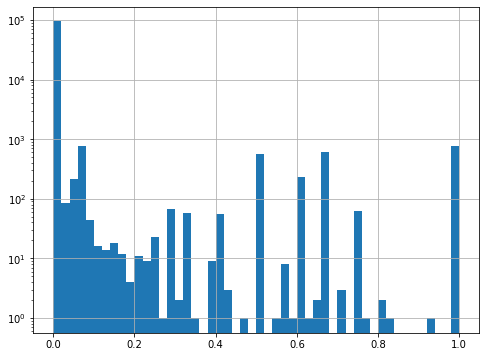

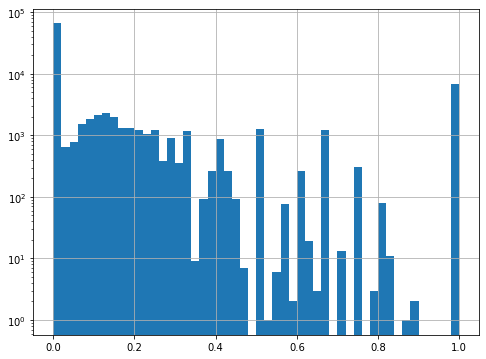

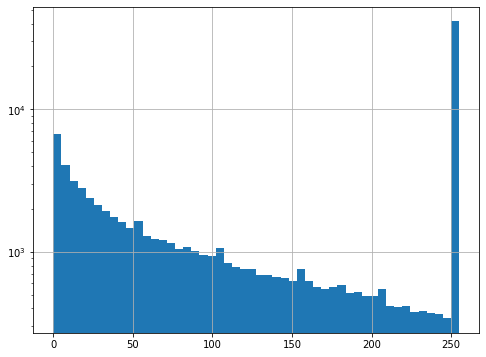

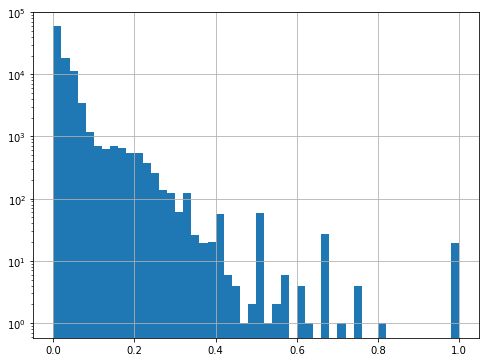

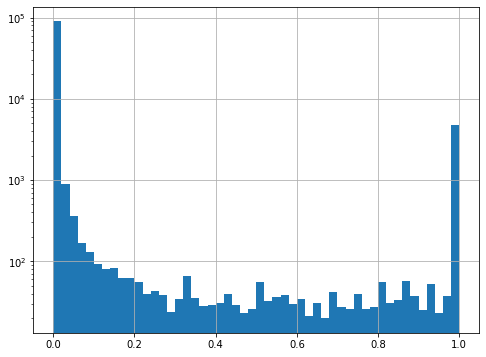

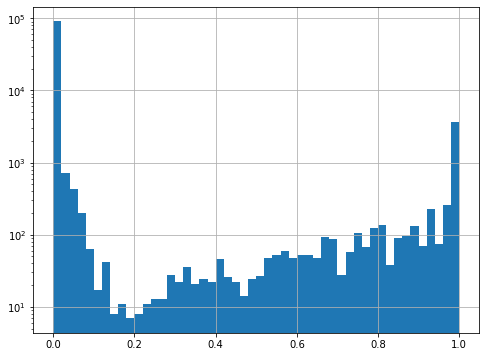

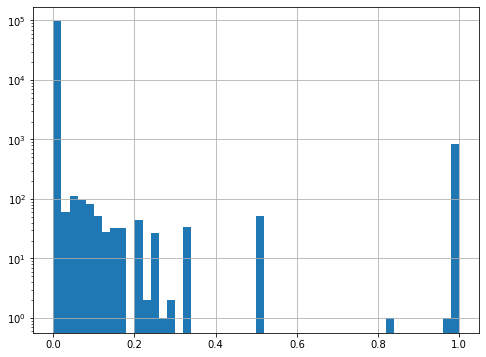

In [241]:
for i in lst:
    df[i].hist(bins=50,figsize=(8,6))
    plt.yscale('log') 
    plt.show()

In [242]:
df.columns

Index(['X', 'duration', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'rerror_rate', 'srv_rerror_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_diff_host_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'serror_rate',
       'Target'],
      dtype='object')

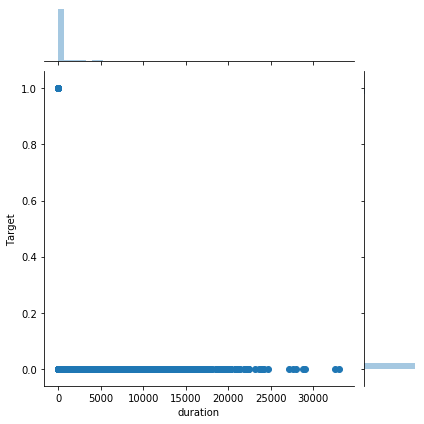

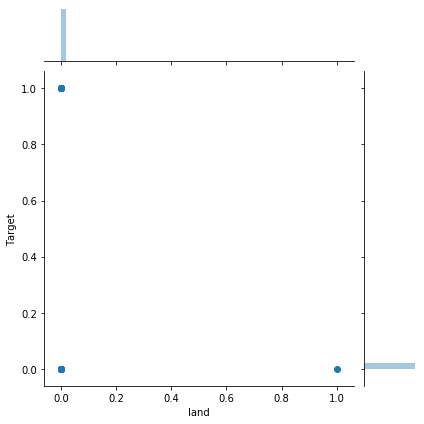

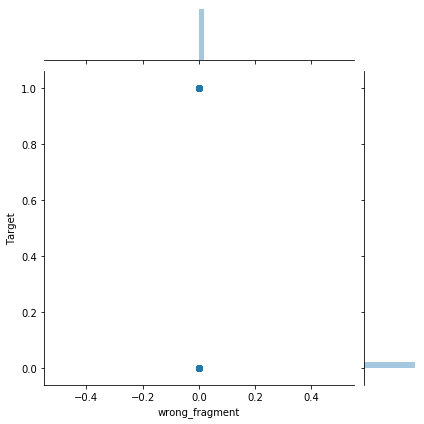

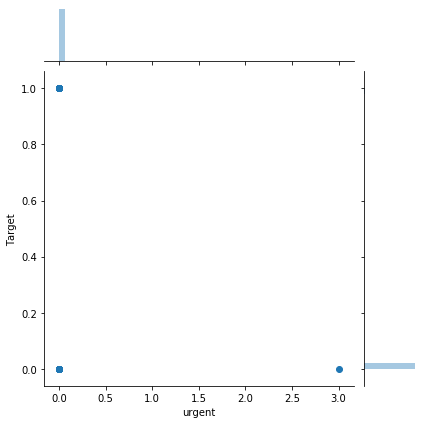

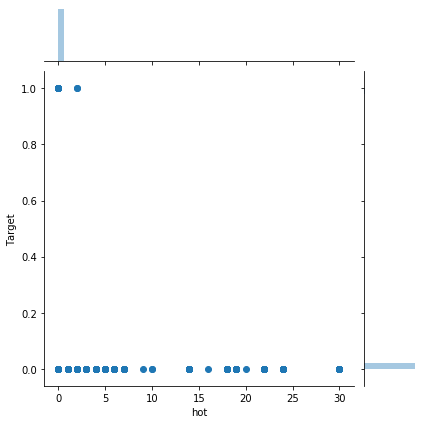

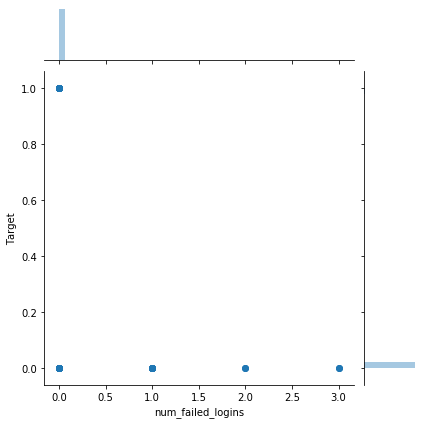

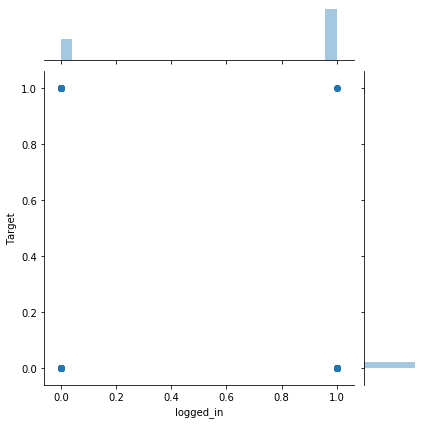

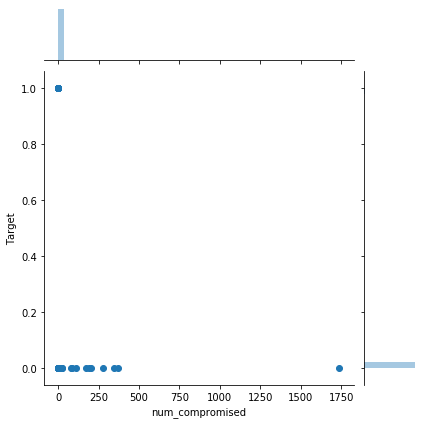

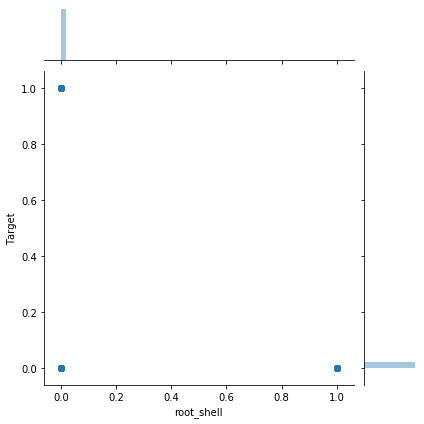

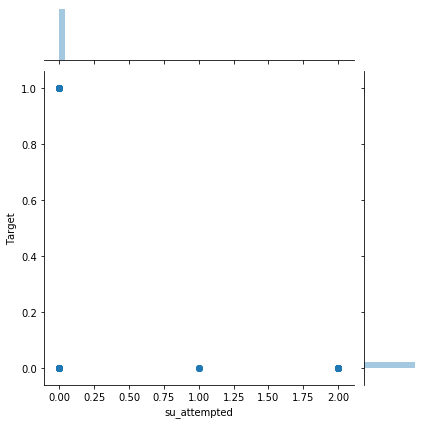

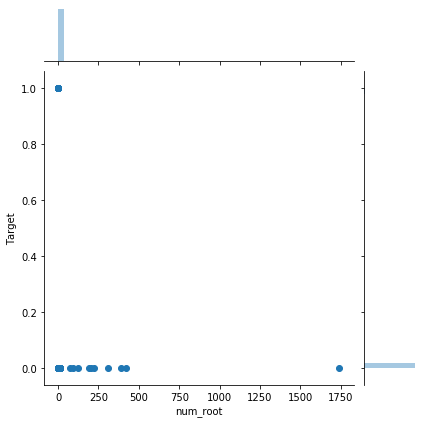

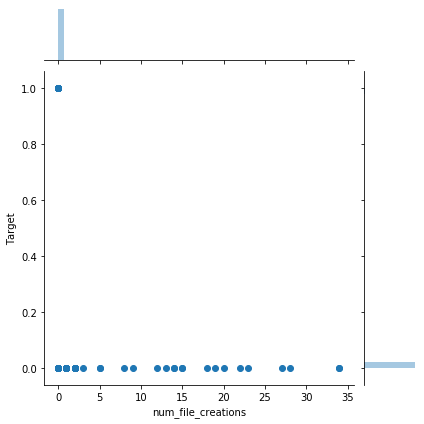

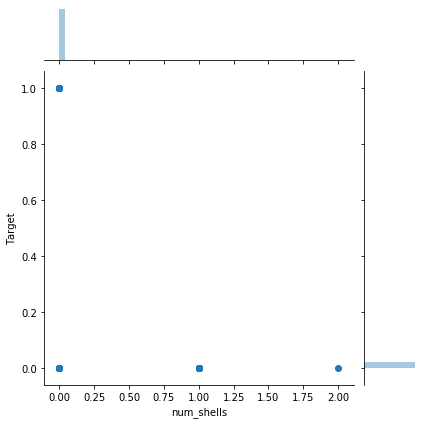

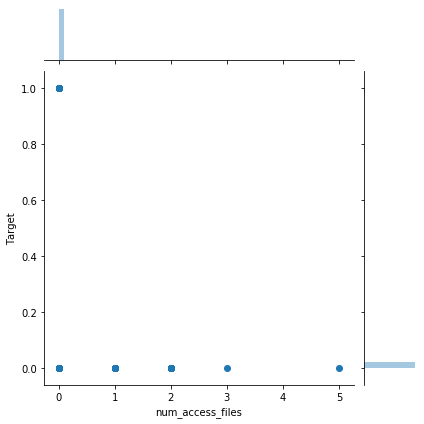

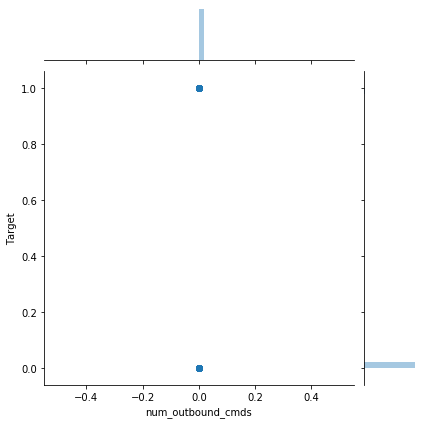

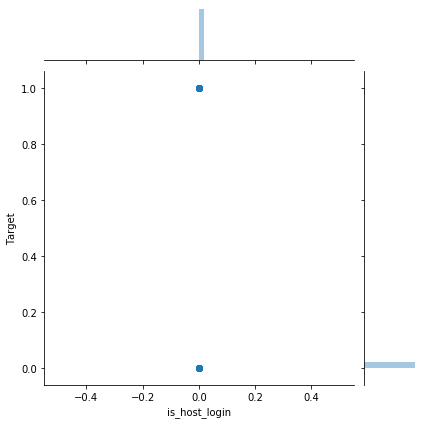

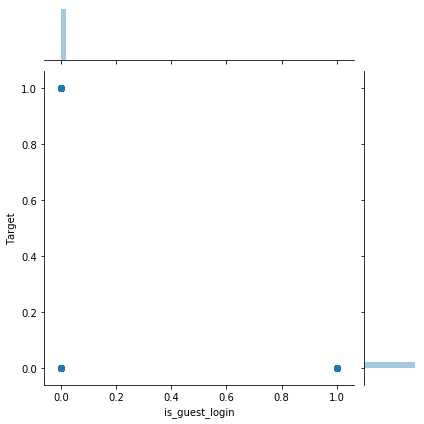

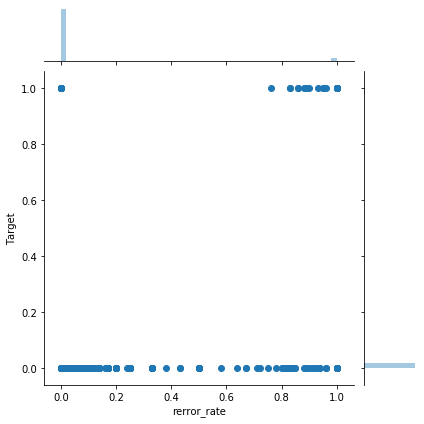

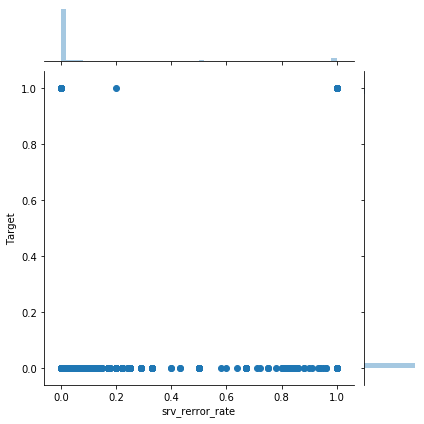

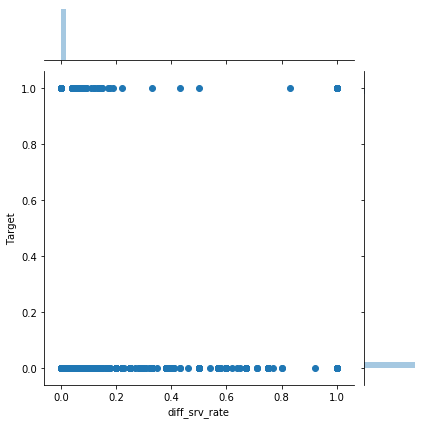

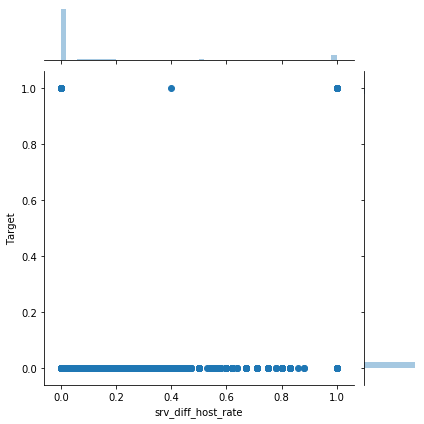

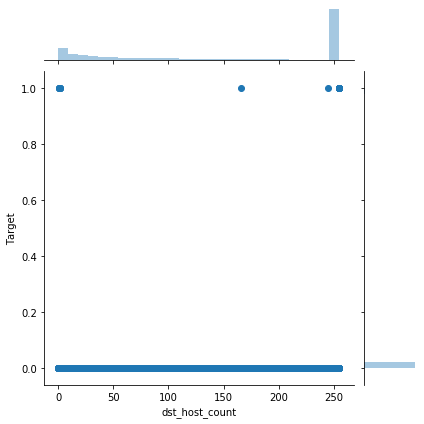

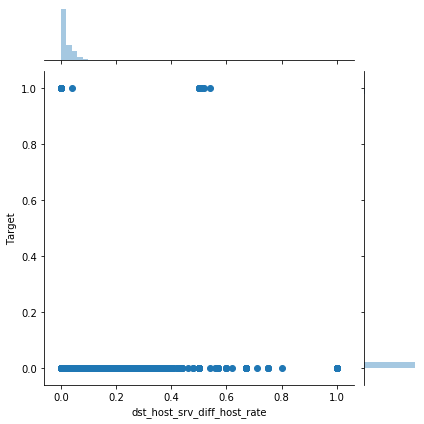

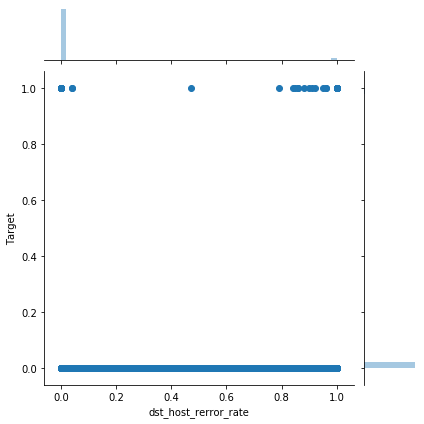

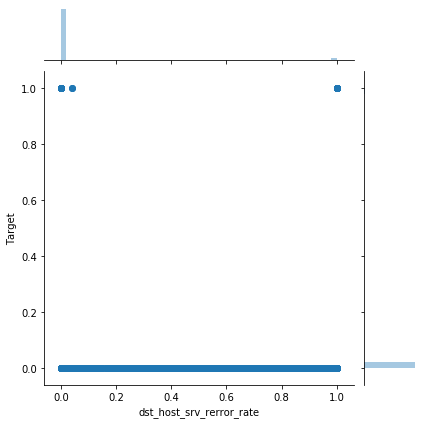

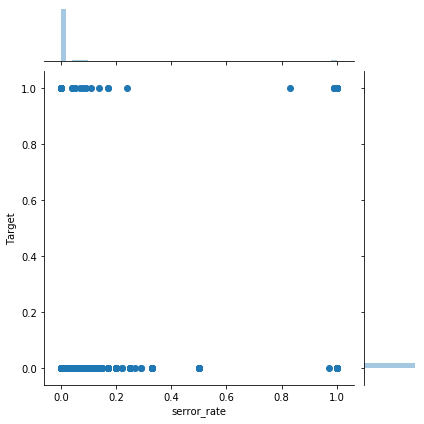

In [243]:
for i in lst:
    sns.jointplot(df[i],df['Target'],data=df)
    plt.show()

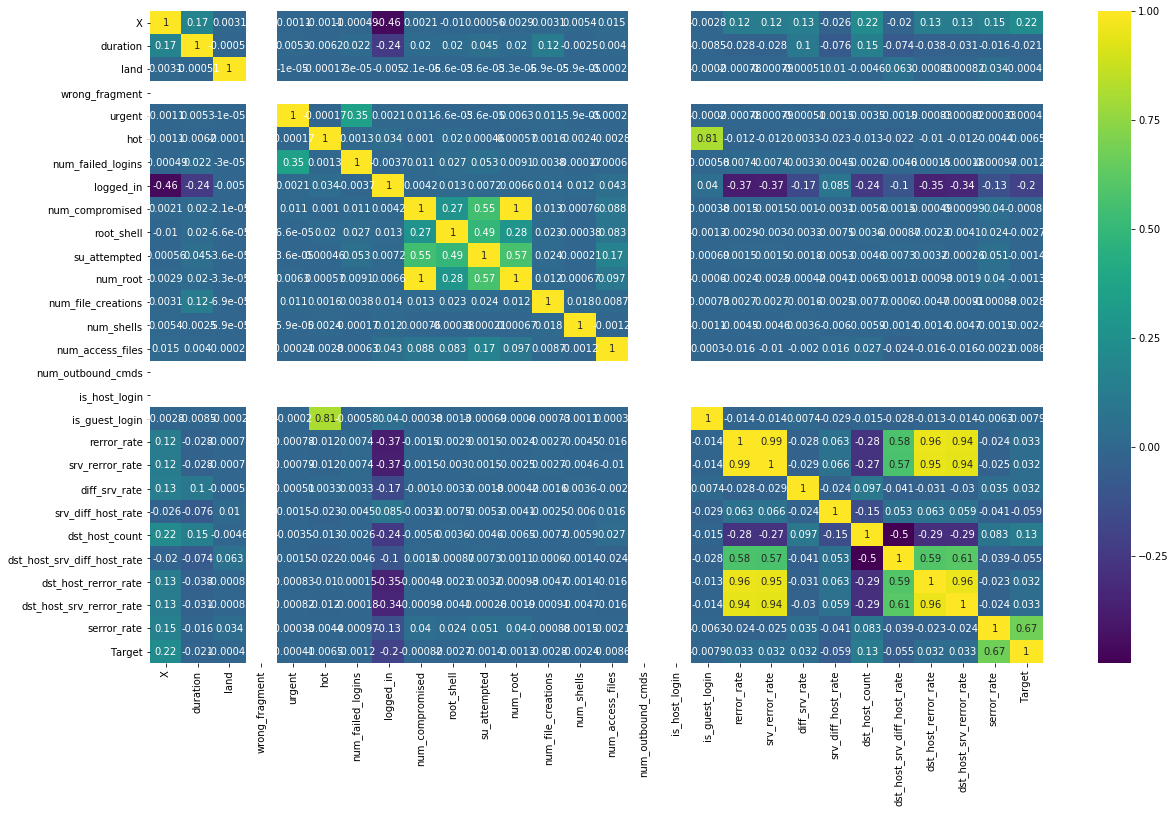

In [244]:
corr = df.corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,12)
sns.heatmap(corr,annot=True, cmap="viridis")

- we can see that there are few variables with high correlation

In [246]:
df.drop(labels='X',axis=1,inplace=True) # As X is a unique column we can drop it

In [247]:
X = df.iloc[:,:26] # independent variables
y = df.iloc[:,-1]  # dependent variables

In [248]:
X.head()

,duration,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,...,is_guest_login,rerror_rate,srv_rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,serror_rate
0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,1.0,26.0,0.01,0.0,0.0,0.00
1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,255.0,0.00,0.0,0.0,0.00
2,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.35,0.0,255.0,0.00,0.0,0.0,0.04
3,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,56.0,0.05,0.0,0.0,0.00
4,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.00,0.0,62.0,0.03,1.0,1.0,0.00


##### model 1 witout feature engineering

In [249]:
# splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((78194, 26), (19549, 26), (78194,), (19549,))

In [250]:
# fit the data to the model

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [251]:
y_pred = clf.predict(X_test) # preidct the values

In [252]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [253]:
print(classification_report(y_test,y_pred)) # evaluation metrics for the model

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     19229
         1.0       0.93      0.58      0.71       320

    accuracy                           0.99     19549
   macro avg       0.96      0.79      0.85     19549
weighted avg       0.99      0.99      0.99     19549



- our accuray is good but recall is poor what we can do is check whether data is balanced or not and then do feature engineering and then build the model

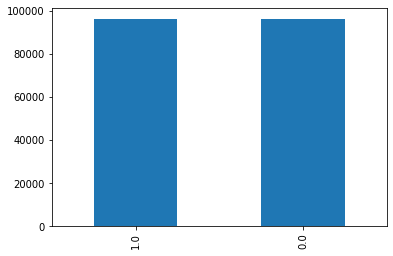

In [254]:
# balancing the data

from imblearn.over_sampling import SMOTE
X_resample,y_resample = SMOTE().fit_resample(X, y)
X_resample = pd.DataFrame(X_resample, columns = X.columns)
pd.Series(y_resample).value_counts().plot.bar() 

In [255]:
#split data intro train and test data

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((153838, 26), (38460, 26), (153838,), (38460,))

In [256]:
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [257]:
pred1 = clf1.predict(X_test)

In [258]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     19220
         1.0       0.89      0.99      0.94     19240

    accuracy                           0.93     38460
   macro avg       0.94      0.93      0.93     38460
weighted avg       0.94      0.93      0.93     38460



In [259]:
y_pred_prob_=clf1.predict_proba(X_test)

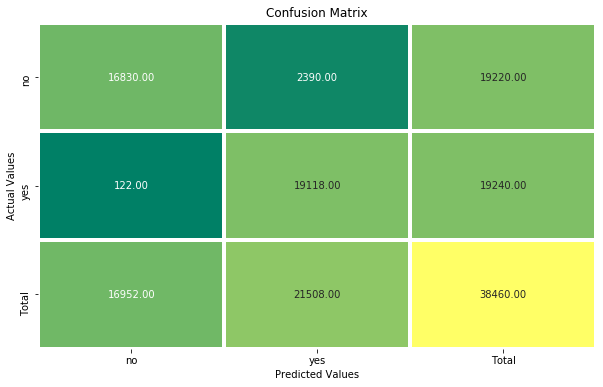

******************************Classifcation Report******************************


              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     19220
         1.0       0.89      0.99      0.94     19240

    accuracy                           0.93     38460
   macro avg       0.94      0.93      0.93     38460
weighted avg       0.94      0.93      0.93     38460


************************************Kappa Score************************************


Kappa Score = 0.8693627273074417

******************************Area Under Curve Score******************************


AUC Score = 0.934654703931499
Number of probabilities to build ROC = 2778


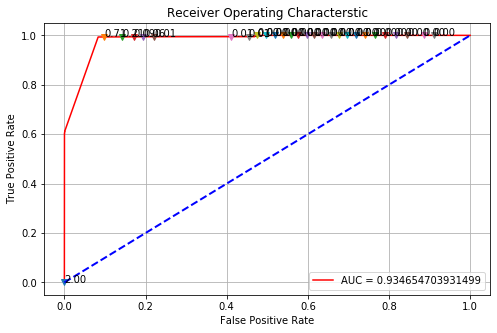

In [260]:
innomatics.classification_metric(y_test,pred1,y_pred_prob_[:,1],label=['no','yes'],n=100,verbose=True)

In [261]:
from sklearn.linear_model import LassoCV

In [262]:
coef = pd.Series(reg_alpha.coef_, index = X.columns)

In [263]:
reg_alpha = LassoCV()
reg_alpha.fit(X_train,y_train)
print("Best alpha using built-in LassoCV: %f" % reg_alpha.alpha_)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.054004
Lasso picked 4 variables and eliminated the other 22 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

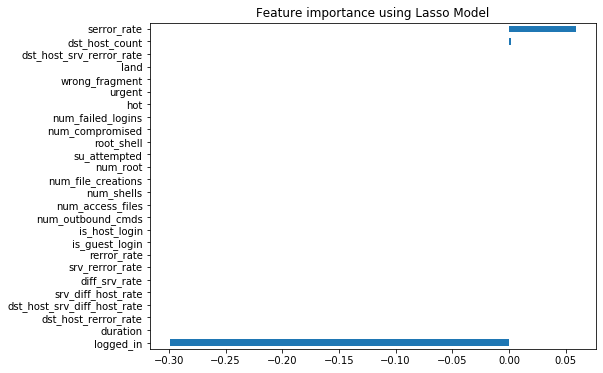

In [264]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 6)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [265]:
target_features = sum(coef != 0)
lasso_features = list(imp_coef[imp_coef!=0].sort_values(ascending=False).index)[:target_features]
lasso_features

['serror_rate', 'dst_host_count', 'duration', 'logged_in']

In [266]:
X_train_new_features = X_train[lasso_features]
X_test_new_features = X_test[lasso_features]

In [267]:
clf2 = LogisticRegression()
clf2.fit(X_train_new_features, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [268]:
pred2=clf2.predict(X_test_new_features)

In [269]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     19220
         1.0       0.88      0.99      0.93     19240

    accuracy                           0.93     38460
   macro avg       0.94      0.93      0.93     38460
weighted avg       0.94      0.93      0.93     38460



In [270]:
import innomatics

In [271]:
y_pred_prob=clf2.predict_proba(X_test_new_features)

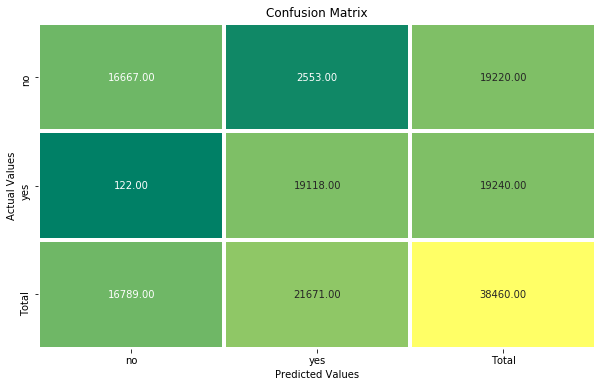

******************************Classifcation Report******************************


              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     19220
         1.0       0.88      0.99      0.93     19240

    accuracy                           0.93     38460
   macro avg       0.94      0.93      0.93     38460
weighted avg       0.94      0.93      0.93     38460


************************************Kappa Score************************************


Kappa Score = 0.8608852528240035

******************************Area Under Curve Score******************************


AUC Score = 0.9304143293217174
Number of probabilities to build ROC = 902


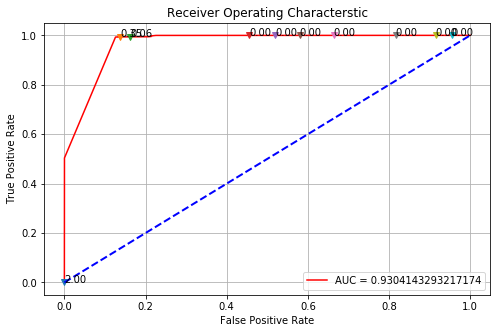

In [272]:
innomatics.classification_metric(y_test,pred2,y_pred_prob[:,1],label=['no','yes'],n=100,verbose=True)

In [273]:
from scipy import stats
z = np.abs(stats.zscore(df))
(z)

array([[0.16051944, 0.0031986 ,        nan, ..., 0.25619517, 0.10201324,
        0.12875727],
       [0.16051944, 0.0031986 ,        nan, ..., 0.25619517, 0.10201324,
        0.12875727],
       [0.16051944, 0.0031986 ,        nan, ..., 0.25619517, 0.32567315,
        0.12875727],
       ...,
       [0.16051944, 0.0031986 ,        nan, ..., 0.25619517, 0.10201324,
        0.12875727],
       [0.16051944, 0.0031986 ,        nan, ..., 0.25619517, 0.10201324,
        0.12875727],
       [0.16051944, 0.0031986 ,        nan, ..., 0.25619517, 0.10201324,
        0.12875727]])

In [274]:
z.shape

(97743, 27)

In [275]:
threshold = 3
print(np.where(z > 3))

(array([    0,     4,     4, ..., 97729, 97735, 97736], dtype=int64), array([20, 17, 18, ..., 16, 20, 19], dtype=int64))


In [276]:
print(z[0][20])

3.171209312916932


In [278]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)

In [280]:
model.fit(X_train_new_features, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [281]:
pred4=model.predict(X_test_new_features)

In [282]:
y_pred_prob4=model.predict_proba(X_test_new_features)

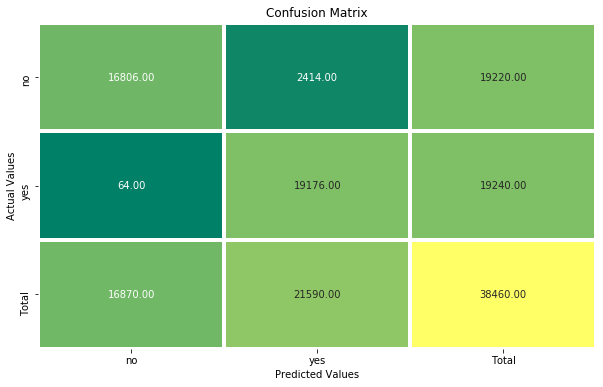

******************************Classifcation Report******************************


              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93     19220
         1.0       0.89      1.00      0.94     19240

    accuracy                           0.94     38460
   macro avg       0.94      0.94      0.94     38460
weighted avg       0.94      0.94      0.94     38460


************************************Kappa Score************************************


Kappa Score = 0.8711306211737968

******************************Area Under Curve Score******************************


AUC Score = 0.9355376308029795
Number of probabilities to build ROC = 10


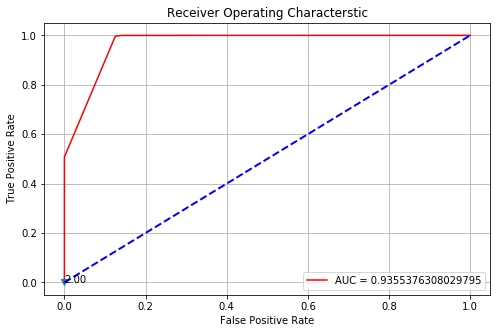

In [283]:
innomatics.classification_metric(y_test,pred4,y_pred_prob4[:,1],label=['no','yes'],n=100,verbose=True)

In [292]:
# using grid search method to find the best parameters for Random forest regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [293]:
model_tune=RandomForestClassifier()

In [294]:
tune_parameter=[{'n_estimators':[10,20,30],
                 'criterion':['gini','entropy'],
                'max_depth':[10,15],
                 'max_features':['sqrt','log2']}]

In [295]:
clf=GridSearchCV(model_tune,param_grid=tune_parameter,cv=5,scoring='roc_auc')

In [296]:
clf.fit(X_train_new_features, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [297]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 20}

In [298]:
model_f=RandomForestClassifier(criterion='gini',max_depth=10,max_features='sqrt',n_estimators=20)

In [299]:
model_f.fit(X_train_new_features, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [300]:
y_pred=model_f.predict(X_test_new_features)
y_pred_probf=model_f.predict_proba(X_test_new_features)

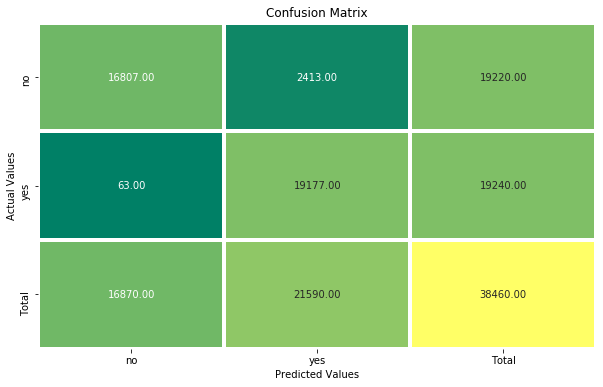

******************************Classifcation Report******************************


              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93     19220
         1.0       0.89      1.00      0.94     19240

    accuracy                           0.94     38460
   macro avg       0.94      0.94      0.94     38460
weighted avg       0.94      0.94      0.94     38460


************************************Kappa Score************************************


Kappa Score = 0.8712346319718809

******************************Area Under Curve Score******************************


AUC Score = 0.9355896328971252
Number of probabilities to build ROC = 17


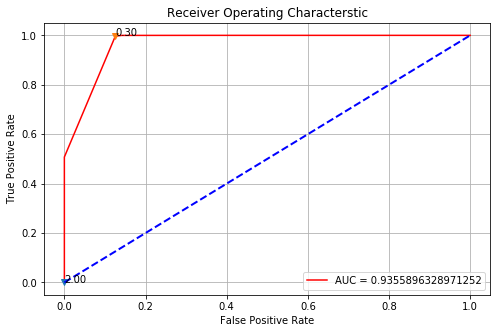

In [301]:
innomatics.classification_metric(y_test,y_pred,y_pred_probf[:,1],label=['no','yes'],n=10,verbose=True)

In [302]:
df1=pd.read_csv('test_final_withoutTarget.csv')

In [303]:
df1.shape

(147000, 28)

In [304]:
df1.head()

,X,duration,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,rerror_rate,srv_rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,serror_rate,Target
0,629325,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.20,255,0.00,0.0,0.0,0.0,NaN
1,598242,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.07,255,0.00,0.0,0.0,0.0,NaN
2,496099,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.00,45,0.06,0.0,0.0,0.0,NaN
3,24450,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.00,177,0.01,0.0,0.0,0.0,NaN
4,46060,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.00,5,0.05,0.0,0.0,0.0,NaN


In [305]:
df2=df1[['serror_rate', 'dst_host_count', 'duration', 'logged_in']]

In [306]:
df2.head()

,serror_rate,dst_host_count,duration,logged_in
0,0.0,255,0,1
1,0.0,255,0,1
2,0.0,45,0,1
3,0.0,177,0,1
4,0.0,5,0,1


In [307]:
x_test_given=df2[:]

In [311]:
pred2=model_f.predict(x_test_given)

In [314]:
(pred2)

array([0., 0., 0., ..., 0., 1., 0.])

In [315]:
len(pred2)

147000